# Anomaly Detection - KDD'99 Dataset

In week 2 of the inzva Applied AI program we will spend most of our time on Anomaly Detection techniques. 

**This notebook includes**

*1- Isolation Forest*

*2- Local Outlier Factor*

*3- Autoencoder*

*4 - XGBoost*

*5 - CatBoost and Hyperparameter Optimization*

*6 - TabNet*

We first start with obtaining the data and creating training and test sets. In this notebook, we create our models only for Probing attack detection.

In this notebook we only work with numerical features. We will drop categorical features in our dataset. You will use the full dataset in your homework in order to compare XGBoost and CatBoost algorithms.





## 1. Data & Analysis

In [1]:
import pandas as pd
kdd = pd.read_csv('/Users/onurboyar/Desktop/JupyterNotebooks/Datasets/kdd.csv')

In [2]:
kdd = kdd.iloc[:,1:43]

In [3]:
kdd = kdd.drop(['Protocol Type', 'Service', 'Flag'], axis = 1)


In [4]:
kdd.shape

(183737, 39)

In [24]:
kdd.describe()

,Duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,1.837370e+05,1.837370e+05,1.837370e+05,183737.000000,183737.000000,1.837370e+05,1.837370e+05,1.837370e+05,1.837370e+05,1.837370e+05,...,1.837370e+05,1.837370e+05,1.837370e+05,1.837370e+05,1.837370e+05,1.837370e+05,1.837370e+05,1.837370e+05,1.837370e+05,1.837370e+05
mean,-3.640197e-14,-1.056812e-15,9.753362e-16,0.000005,0.000697,5.397149e-16,-2.331502e-14,-9.633879e-15,1.194191e-13,-1.428721e-15,...,4.349572e-15,3.331752e-14,1.545878e-13,-7.998783e-14,1.042442e-13,-1.635035e-16,1.020946e-14,2.471166e-14,1.029228e-13,-9.611212e-16
std,9.999973e-01,9.999973e-01,9.999973e-01,0.002333,0.043640,9.999973e-01,9.999973e-01,9.999973e-01,9.999973e-01,9.999973e-01,...,9.999973e-01,9.999973e-01,9.999973e-01,9.999973e-01,9.999973e-01,9.999973e-01,9.999973e-01,9.999973e-01,9.999973e-01,9.999973e-01
min,-1.501030e-01,-1.450685e-02,-8.699338e-02,0.000000,0.000000,-1.025347e-02,-7.347231e-02,-9.282620e-02,-1.500984e+00,-7.873908e-03,...,-1.803474e+00,-2.793559e+00,-3.475423e+00,-3.464397e-01,-5.074414e-01,-3.659654e-01,-1.069506e-01,-7.539644e-02,-3.017272e-01,-2.967496e-01
25%,-1.501030e-01,-1.364598e-02,-7.548494e-02,0.000000,0.000000,-1.025347e-02,-7.347231e-02,-9.282620e-02,-1.173472e+00,-7.873908e-03,...,-1.077665e+00,-7.749125e-02,3.393276e-01,-3.464397e-01,-4.753133e-01,-3.659654e-01,-1.069506e-01,-7.539644e-02,-3.017272e-01,-2.967496e-01
50%,-1.494535e-01,-4.984003e-03,-5.291073e-02,0.000000,0.000000,-5.643673e-03,-7.347231e-02,-2.147289e-02,6.662233e-01,-7.208470e-03,...,7.508105e-01,4.701381e-01,3.778605e-01,-2.485595e-01,-3.463717e-01,-2.565694e-01,-1.069506e-01,-7.252428e-02,-2.235746e-01,-2.577025e-01
75%,-2.549583e-02,-4.888098e-03,-3.004341e-02,0.000000,0.000000,-5.643673e-03,-5.274024e-02,-2.147289e-02,8.521615e-01,-7.208470e-03,...,7.508105e-01,6.532273e-01,5.365422e-01,-1.918766e-01,-2.504167e-01,4.609461e-02,-9.664964e-02,-7.252428e-02,-2.146693e-01,-2.047013e-01
max,1.134389e+02,3.196954e+02,1.653286e+02,1.000000,3.000000,2.480652e+02,1.782544e+02,1.468001e+02,8.521615e-01,2.241221e+02,...,1.019572e+00,6.532273e-01,5.365422e-01,5.419733e+00,4.120075e+00,1.487663e+01,2.105394e+01,1.764532e+01,5.592885e+00,5.161322e+00


<AxesSubplot:>

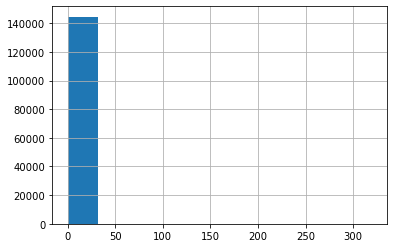

In [44]:
kdd['src_bytes'].hist()

<AxesSubplot:>

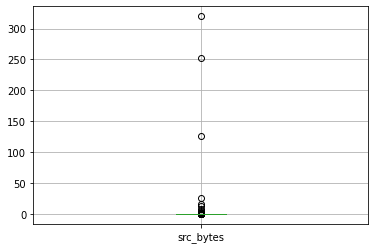

In [29]:
kdd.boxplot(column = ['src_bytes'])

In [31]:
kdd.isnull().sum()

Duration                       0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed                     0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_s

In [30]:
kdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183737 entries, 0 to 183736
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Duration                     183737 non-null  float64
 1   src_bytes                    183737 non-null  float64
 2   dst_bytes                    183737 non-null  float64
 3   land                         183737 non-null  int64  
 4   wrong_fragment               183737 non-null  int64  
 5   urgent                       183737 non-null  float64
 6   hot                          183737 non-null  float64
 7   num_failed                   183737 non-null  float64
 8   logged_in                    183737 non-null  float64
 9   num_compromised              183737 non-null  float64
 10  root_shell                   183737 non-null  float64
 11  su_attempted                 183737 non-null  float64
 12  num_root                     183737 non-null  float64
 13 

In [37]:
kdd.duplicated().sum()

0

In [36]:
kdd.drop_duplicates(inplace=True)

In [38]:
#kdd.corr()

,Duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
Duration,1.000000,0.004578,0.021672,-0.000351,-0.000347,0.003690,0.012719,0.001486,-0.146037,0.098938,...,0.068190,-0.189572,-0.214620,0.255215,0.204651,-0.024366,0.012989,0.006247,0.013741,0.020110
src_bytes,0.004578,1.000000,0.007928,-0.000014,-0.000233,-0.000045,0.002330,-0.000535,-0.012170,-0.000056,...,0.000027,-0.017917,-0.015160,0.001398,0.008754,0.002703,0.007055,0.022344,-0.001297,0.000915
dst_bytes,0.021672,0.007928,1.000000,-0.000176,-0.001709,0.011452,0.000287,0.025406,0.019351,0.026384,...,-0.019988,-0.015013,-0.002238,-0.016368,0.007375,0.002882,0.003843,0.007759,-0.015288,-0.015691
land,-0.000351,-0.000014,-0.000176,1.000000,-0.000047,-0.000019,-0.000208,-0.000062,-0.005424,-0.000022,...,-0.003197,-0.005172,0.001413,-0.000864,0.007509,0.008351,0.055836,0.003844,-0.000759,-0.000738
wrong_fragment,-0.000347,-0.000233,-0.001709,-0.000047,1.000000,-0.000202,-0.001089,-0.001643,-0.030348,-0.000159,...,-0.001357,-0.039489,-0.032805,0.002834,0.030775,0.007797,0.011099,-0.001459,0.006002,-0.003239
urgent,0.003690,-0.000045,0.011452,-0.000019,-0.000202,1.000000,0.024185,0.084431,0.004443,0.039020,...,-0.007518,-0.019645,-0.015221,0.013500,0.003135,0.002830,0.001669,-0.000639,-0.000892,0.003740
hot,0.012719,0.002330,0.000287,-0.000208,-0.001089,0.024185,1.000000,0.007537,0.035556,0.009142,...,0.023482,-0.126645,-0.134481,0.016140,-0.021403,-0.019025,0.018972,-0.000583,0.002000,-0.014772
num_failed,0.001486,-0.000535,0.025406,-0.000062,-0.001643,0.084431,0.007537,1.000000,-0.087611,0.004282,...,0.017104,-0.060760,-0.043562,-0.002525,-0.014387,-0.003188,0.027317,0.017950,0.032950,0.036186
logged_in,-0.146037,-0.012170,0.019351,-0.005424,-0.030348,0.004443,0.035556,-0.087611,1.000000,0.004389,...,-0.148581,0.462860,0.435803,-0.398185,-0.397248,-0.165710,-0.102782,-0.112004,-0.414882,-0.409466
num_compromised,0.098938,-0.000056,0.026384,-0.000022,-0.000159,0.039020,0.009142,0.004282,0.004389,1.000000,...,-0.006233,-0.018696,-0.017727,0.001994,-0.001598,-0.001139,0.007625,0.010023,-0.001596,-0.001197


In [5]:
kdd_train = kdd.iloc[0:102563, :]

In [6]:
kdd_test = kdd.iloc[102563:183737, :]

In [7]:
kdd_train_probe = kdd_train[(kdd_train.Type_Groups == 'Normal') | (kdd_train.Type_Groups == 'Probe')]
kdd_test_probe = kdd_test[(kdd_test.Type_Groups == 'Normal') | (kdd_test.Type_Groups == 'Probe')]

In [10]:
kdd = pd.concat([kdd_train_probe, kdd_test_probe])

In [11]:
kdd.shape

(166144, 39)

In [80]:
kdd.groupby(['Type_Groups'])['Type_Groups'].count()

Type_Groups
Normal    157871
Probe       8273
Name: Type_Groups, dtype: int64

In [81]:
157871 / 8273

19.082678593013416

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.neighbors import NearestNeighbors
import seaborn as sns


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

## 1.1 Isolation Forest

How many lines should I draw to separate a point from the others? If the point is not in a dense region, it won't take that much lines even if we draw these lines randomly. This is the logic behind the Isolation Forest algorithm. It uses number of lines necessary to separate a point from others to calculate its anomaly score. The most basic (and actually incorrect) way to think of this anomaly score is

$AnomalyScore = e^{\#Lines} $

Normals are encoded as 1, anomalies are encoded as -1. Use this version if you want to apply Isolation Forest or Local Outlier Factor.

- n_estimators, default=100: The number of base estimators in the ensemble.
- max_samples “auto”, int or float, default=”auto”: The number of samples to draw from X to train each base estimator
- contamination ‘auto’ or float, default=’auto’: The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the scores of the samples.
- max_features int or float, default=1.0: The number of features to draw from X to train each base estimator.


In [ ]:
kdd_train_probe['Type_Groups'] = np.where(kdd_train_probe['Type_Groups'] == 'Normal', 1, -1)
kdd_test_probe['Type_Groups'] = np.where(kdd_test_probe['Type_Groups'] == 'Normal', 1, -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
x_train = kdd_train_probe.drop(['Type_Groups'], axis = 1)
y_train = kdd_train_probe['Type_Groups']

In [ ]:
x_test = kdd_test_probe.drop(['Type_Groups'], axis = 1)
y_test = kdd_test_probe['Type_Groups']

In [ ]:
clfIF = IsolationForest(max_samples=0.25, random_state=11, contamination=0.15, n_estimators=100, n_jobs=-1)

In [ ]:
clfIF.fit(x_train, y_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.15,
                max_features=1.0, max_samples=0.25, n_estimators=100, n_jobs=-1,
                random_state=11, verbose=0, warm_start=False)

In [ ]:
y_pred_train = clfIF.predict(x_train)

In [ ]:
np.unique(y_pred_train)

array([-1,  1])

In [ ]:
conf_matrix = confusion_matrix(y_train, y_pred_train)
conf_matrix

array([[ 3996,   111],
       [11212, 86066]])

In [ ]:
y_pred_test_if = clfIF.predict(x_test)
conf_matrix_if_test = confusion_matrix(y_test, y_pred_test_if)

In [45]:
conf_matrix_if_test

NameError: name 'conf_matrix_if_test' is not defined

In [ ]:
print(classification_report(y_test, y_pred_test_if))

              precision    recall  f1-score   support

          -1       0.34      1.00      0.50      4166
           1       1.00      0.86      0.93     60593

    accuracy                           0.87     64759
   macro avg       0.67      0.93      0.72     64759
weighted avg       0.96      0.87      0.90     64759



## 1.3 Local Outlier Factor

In [ ]:
from sklearn.preprocessing import StandardScaler
## density based methods works better with scaling
std_scale = StandardScaler()
kdd[['src_bytes']]=std_scale.fit_transform(kdd[['src_bytes']])

In [ ]:
clfLOF = LocalOutlierFactor(n_neighbors=2, metric='euclidean', algorithm='auto', contamination=0.15, n_jobs=-1)
clfLOF.fit(x_train, y_train)

In [ ]:
y_pred_train_lof = clfLOF.fit_predict(x_train, y_train)

In [ ]:
conf_matrix_lof = confusion_matrix(y_train, y_pred_train_lof)
conf_matrix_lof

array([[  546,  3561],
       [14662, 82616]])

In [ ]:
y_pred_test_lof = clfLOF.fit_predict(x_test, y_test)
conf_matrix_lof_test = confusion_matrix(y_test, y_pred_test_lof)
conf_matrix_lof_test

array([[ 1082,  3084],
       [ 8632, 51961]])

In [ ]:
print(classification_report(y_test, y_pred_test_lof))

              precision    recall  f1-score   support

          -1       0.11      0.26      0.16      4166
           1       0.94      0.86      0.90     60593

    accuracy                           0.82     64759
   macro avg       0.53      0.56      0.53     64759
weighted avg       0.89      0.82      0.85     64759



## 1.4 Autoencoder

In [ ]:
import pickle
from scipy import stats
import tensorflow as tf
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

## 1.4.1 Probing Attack Detection

In [17]:
kdd_train_probe = kdd_train[(kdd_train.Type_Groups == 'Normal') | (kdd_train.Type_Groups == 'Probe')]
kdd_test_probe = kdd_test[(kdd_test.Type_Groups == 'Normal') | (kdd_test.Type_Groups == 'Probe')]

kdd_train_probe['Type_Groups'] = np.where(kdd_train_probe['Type_Groups'] == 'Normal', 0, 1)
kdd_test_probe['Type_Groups'] = np.where(kdd_test_probe['Type_Groups'] == 'Normal', 0, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## We need to create Validation Test

In [ ]:
kdd_test_probe.groupby('Type_Groups').count()

,Duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
Type_Groups,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593,60593
1,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166,4166


In [ ]:
kdd_test_probe.iloc[14000:34000,:].groupby('Type_Groups').count()

,Duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
Type_Groups,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756,18756
1,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244


In [ ]:
kdd_valid_probe = kdd_test_probe.iloc[14000:34000,:]

In [ ]:
kdd_test_v2_probe = pd.concat([kdd_test_probe.iloc[0:14000,:], kdd_test_probe.iloc[34001:64759,:]])

In [ ]:
kdd_test_v2_probe.groupby('Type_Groups').count()

,Duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
Type_Groups,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836,41836
1,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922,2922


Now that we obtained Train, Test and Validation sets, we can train our data and optimize the reconstruction error threshold using test set. Then, we will perform our actual prediction task by using Validation set.

In [ ]:
X_train, X_test = kdd_train_probe, kdd_test_v2_probe
X_train = X_train[X_train.Type_Groups == 0]
X_train = X_train.drop(['Type_Groups'], axis=1)
y_test = X_test['Type_Groups']
X_test = X_test.drop(['Type_Groups'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape

(97278, 38)

In [ ]:
input_dim = X_train.shape[1]
encoding_dim = 14
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder_corr = Model(inputs=input_layer, outputs=decoder)

In [ ]:
nb_epoch = 5
batch_size = 100
batch_index=0
autoencoder_corr.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",  #TO SAVE THE MODEL
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder_corr.fit(X_train, X_train, #INPUT AND EXPECTED OUTPUT ARE THE SAME.
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/5
973/973 [==============================] - 4s 3ms/step - loss: 0.4853 - accuracy: 0.4874 - val_loss: 0.6084 - val_accuracy: 0.6571
Epoch 2/5
973/973 [==============================] - 2s 2ms/step - loss: 0.2893 - accuracy: 0.8466 - val_loss: 0.5704 - val_accuracy: 0.6501
Epoch 3/5
973/973 [==============================] - 2s 2ms/step - loss: 0.2898 - accuracy: 0.8700 - val_loss: 0.5663 - val_accuracy: 0.6442
Epoch 4/5
973/973 [==============================] - 2s 2ms/step - loss: 0.2627 - accuracy: 0.8628 - val_loss: 0.5470 - val_accuracy: 0.5853
Epoch 5/5
973/973 [==============================] - 2s 2ms/step - loss: 0.2615 - accuracy: 0.8545 - val_loss: 0.5453 - val_accuracy: 0.6316


# Tune the threshold value using test set

In [ ]:
predictions = autoencoder_corr.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.head()

,reconstruction_error,true_class
102563,0.065080,0
102564,0.065080,0
102565,0.065080,0
102569,0.653062,0
102570,0.064486,0


In [ ]:
threshold = np.arange(0, 1, 0.01)
results = np.zeros(100)
probe = np.zeros(100)
i = 0
for t in threshold:
  y_pred = [1 if e > t else 0 for e in error_df.reconstruction_error.values]
  conf_matrix = confusion_matrix(error_df.true_class, y_pred)
  results[i] = (conf_matrix[0,0] + conf_matrix[1,1]) / 44758 #64759
  probe[i] = conf_matrix[1,1] / 2922 #4166
  i = i + 1

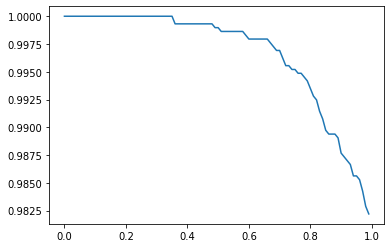

In [ ]:
import matplotlib.pyplot as plt
plt.plot(threshold, probe)

In [ ]:
probe

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99931554,
       0.99931554, 0.99931554, 0.99931554, 0.99931554, 0.99897331,
       0.99897331, 0.99828884, 0.99828884, 0.99828884, 0.99794661,
       0.99760438, 0.99726215, 0.99691992, 0.99691992, 0.99657769,
       0.99486653, 0.9945243 , 0.99315537, 0.99212868, 0.99075975,
       0.99075975, 0.99007529, 0.98973306, 0.9890486 , 0.9890486 ,
       0.98870637, 0.98836413, 0.98733744, 0.98631075, 0.98631

In [ ]:
results

In [ ]:
threshold = 0.13 # 0.20 de iyi
LABELS = ["Normal", "Probing"]
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
#plt.figure(figsize=(12, 12))
#sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
#plt.title("Confusion matrix")
#plt.ylabel('True class')
#plt.xlabel('Predicted class')
#plt.show()
conf_matrix

array([[36569,  5267],
       [    0,  2922]])

In [26]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

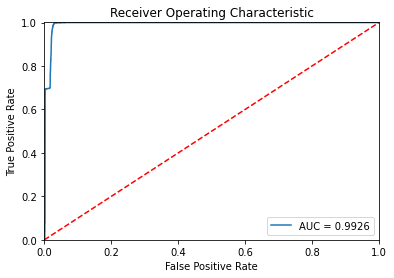

In [ ]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

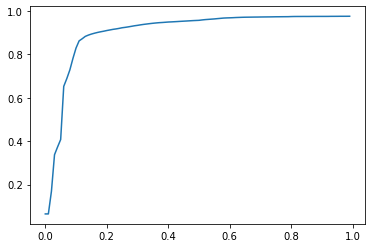

In [ ]:
plt.plot(threshold, results)

Let's try if we can find a better threshold value between 0.14 and 0.18.

In [ ]:
threshold = np.arange(0.3, 0.5, 0.001)
results = np.zeros(200)
probe = np.zeros(200)
i = 0
for t in threshold:
  y_pred = [1 if e > t else 0 for e in error_df.reconstruction_error.values]
  conf_matrix = confusion_matrix(error_df.true_class, y_pred)
  results[i] = (conf_matrix[0,0] + conf_matrix[1,1]) / 44758
  probe[i] = conf_matrix[1,1] / 2922
  i = i + 1

In [ ]:
threshold

In [ ]:
probe

In [ ]:
results

Let's fix our threshold value to 0.499 and apply it to Validation Set.

In [ ]:
X_valid = kdd_valid_probe
y_valid = X_valid['Type_Groups']
X_valid = X_valid.drop(['Type_Groups'], axis=1)
X_valid = X_valid.values

In [ ]:
predictions = autoencoder_corr.predict(X_valid)
mse = np.mean(np.power(X_valid - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_valid})
error_df.describe()

,reconstruction_error,true_class
count,20000.000000,20000.000000
mean,0.553160,0.062200
std,19.441038,0.241524
min,0.019957,0.000000
25%,0.041338,0.000000
50%,0.086328,0.000000
75%,0.131369,0.000000
max,1940.447577,1.000000


In [ ]:
threshold = 0.499 # 0.20 de iyi
LABELS = ["Normal", "Probing"]
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
conf_matrix

array([[18290,   466],
       [   94,  1150]])

## XGBoosting

In [16]:
from numpy import loadtxt
from sklearn.metrics import accuracy_score
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import time

ModuleNotFoundError: No module named 'imblearn'

In [11]:
kdd_train_probe.head()

,Duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Type_Groups
0,-0.150103,-0.004917,0.019931,0,0,-0.005644,-0.073472,-0.021473,0.666223,-0.007208,-0.023163,-0.010262,-0.012379,-0.024657,-0.021773,-0.060732,0,0,-0.081998,-0.112107,-0.125503,-0.093846,-0.078612,-0.291137,-0.290134,0.198961,-0.201086,-0.478157,-1.336229,-1.990255,0.536542,-0.34644,-0.154032,-0.365965,-0.106951,-0.072524,-0.301727,-0.29675,Normal
1,-0.150103,-0.004890,-0.048616,0,0,-0.005644,-0.073472,-0.021473,0.666223,-0.007208,-0.023163,-0.010262,-0.012379,-0.024657,-0.021773,-0.060732,0,0,-0.081998,-0.112107,-0.125503,-0.093846,-0.078612,-0.291137,-0.290134,0.198961,-0.201086,-0.478157,-1.240464,-1.882796,0.536542,-0.34644,-0.346801,-0.365965,-0.106951,-0.072524,-0.301727,-0.29675,Normal
2,-0.150103,-0.004892,-0.036865,0,0,-0.005644,-0.073472,-0.021473,0.666223,-0.007208,-0.023163,-0.010262,-0.012379,-0.024657,-0.021773,-0.060732,0,0,-0.081998,-0.112107,-0.125503,-0.093846,-0.078612,-0.291137,-0.290134,0.198961,-0.201086,-0.478157,-1.144700,-1.775337,0.536542,-0.34644,-0.411057,-0.365965,-0.106951,-0.072524,-0.301727,-0.29675,Normal
3,-0.150103,-0.004899,-0.036865,0,0,-0.005644,-0.073472,-0.021473,0.666223,-0.007208,-0.023163,-0.010262,-0.012379,-0.024657,-0.021773,-0.060732,0,0,-0.081998,-0.145850,-0.218540,-0.093846,-0.078612,-0.291137,-0.290134,0.198961,-0.201086,-0.478157,-1.048936,-1.667879,0.536542,-0.34644,-0.411057,-0.365965,-0.106951,-0.072524,-0.301727,-0.29675,Normal
4,-0.150103,-0.004900,-0.027268,0,0,-0.005644,-0.073472,-0.021473,0.666223,-0.007208,-0.023163,-0.010262,-0.012379,-0.024657,-0.021773,-0.060732,0,0,-0.081998,-0.145850,-0.218540,-0.093846,-0.078612,-0.291137,-0.290134,0.198961,-0.201086,-0.478157,-0.953172,-1.560420,0.536542,-0.34644,-0.443185,-0.365965,-0.106951,-0.072524,-0.301727,-0.29675,Normal


In [12]:
def xgb_classifier(X_train, X_test, y_train, y_test, useTrainCV=True, cv_folds=5, 
                   early_stopping_rounds=50):
    """
    # {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3} 0.862920874517388
    # {'colsample_bytree': 1.0, 'gamma': 0.2} 0.871
    # {'gamma': 0.2, 'scale_pos_weight': 1} 0.8702009952422571
    # {'subsample': 0.6} 0.864310306628855
    """
    alg = XGBClassifier(learning_rate=0.1, 
                        n_estimators=140, 
                        max_depth=5, # maximum number of features used in each tree
                        min_child_weight=3, 
                        gamma=0.2, 
                        subsample=0.6, #hich is for each tree the % of rows taken to build the tree. 
                                        #I recommend not taking out too many rows, as performance will drop a lot. Take values from 0.8 to 1.
                        colsample_bytree=0.6, # number of columns used by each tree. 
                        #In order to avoid some columns to take too much credit for the prediction 
                        #(think of it like in recommender systems when you recommend the most purchased products
                        #and forget about the long tail), take out a good proportion of columns. 
                        #Values from 0.3 to 0.8 if you have many columns (especially if you did one-hot encoding), 
                        #or 0.8 to 1 if you only have a few columns.
                        objective='binary:logistic', 
                        nthread=4, 
                        scale_pos_weight=20, 
                        seed=27)

    if useTrainCV:
        print("Start Feeding Data")
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
        # xgtest = xgb.DMatrix(X_test.values, label=y_test.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    print('Start Training')
    alg.fit(X_train, y_train, eval_metric='auc')

    # param_test1 = {}
    # gsearch1 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
    #                                                 min_child_weight=3, gamma=0.2, subsample=0.8,
    #                                                 colsample_bytree=1.0,
    #                                                 objective='binary:logistic', nthread=4, scale_pos_weight=1,
    #                                                 seed=27),
    #                         param_grid=param_test1,
    #                         scoring='f1',
    #                         n_jobs=4, iid=False, cv=5)
    # gsearch1.fit(X_train, y_train)
    # print(gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_)

    print("Start Predicting")
    predictions = alg.predict(X_test)
    pred_proba = alg.predict_proba(X_test)[:, 1]

    print("\nResulting Metrics")
    print("Accuracy : %.4g" % metrics.accuracy_score(y_test, predictions))
    print("AUC : %f" % metrics.roc_auc_score(y_test, pred_proba))
    print("F1 Score : %f" % metrics.f1_score(y_test, predictions))

    feat_imp = alg.feature_importances_
    feat = X_train.columns.tolist()
    # clf.best_estimator_.booster().get_fscore()
    res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False)
    res_df.plot('Features', 'Importance', kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.show()
    print(res_df)
    print(res_df["Features"].tolist())
    return alg


In [ ]:
kdd_train_probe = kdd_train[(kdd_train.Type_Groups == 'Normal') | (kdd_train.Type_Groups == 'Probe')]
kdd_test_probe = kdd_test[(kdd_test.Type_Groups == 'Normal') | (kdd_test.Type_Groups == 'Probe')]

kdd_train_probe['Type_Groups'] = np.where(kdd_train_probe['Type_Groups'] == 'Normal', 0, 1)
kdd_test_probe['Type_Groups'] = np.where(kdd_test_probe['Type_Groups'] == 'Normal', 0, 1)

In [19]:
y_train = kdd_train_probe['Type_Groups']

In [20]:
X_train = kdd_train_probe.drop(['Type_Groups'], axis = 1)

In [21]:
y_test = kdd_test_probe['Type_Groups']
X_test = kdd_test_probe.drop(['Type_Groups'], axis = 1)

Start Feeding Data
Start Training
Start Predicting

Resulting Metrics
Accuracy : 0.9614
AUC : 0.988588
F1 Score : 0.754472


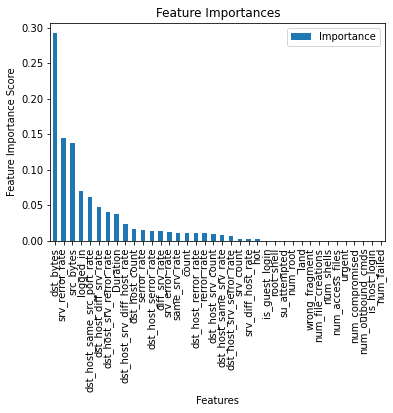

                       Features  Importance
2                     dst_bytes    0.292107
24              srv_rerror_rate    0.145073
1                     src_bytes    0.137521
8                     logged_in    0.070587
32  dst_host_same_src_port_rate    0.061325
31       dst_host_diff_srv_rate    0.046960
37     dst_host_srv_rerror_rate    0.040418
0                      Duration    0.037696
33  dst_host_srv_diff_host_rate    0.024021
28               dst_host_count    0.015861
21                  serror_rate    0.014469
34         dst_host_serror_rate    0.014113
26                diff_srv_rate    0.013917
22               srv_error_rate    0.011445
25                same_srv_rate    0.011157
19                        count    0.011137
36         dst_host_rerror_rate    0.010694
23                  rerror_rate    0.010306
29           dst_host_srv_count    0.009933
30       dst_host_same_srv_rate    0.008326
35     dst_host_srv_serror_rate    0.006300
20                    srv_count 

XGBClassifier(colsample_bytree=0.6, gamma=0.2, max_depth=5, min_child_weight=3,
              n_estimators=140, nthread=4, scale_pos_weight=20, seed=27,
              subsample=0.6)

In [22]:
xgb_classifier(X_train, X_test, y_train, y_test)

## CatBoost

CatBoost is another boosting algorithm created by Yandex. It has unique way of handling with categorical variables. It is shown that CatBoost performs extremely well with its default parameters. We can optimize the hyperparameters using cross validation, random search, grid search or Bayesian Optimization.

In [ ]:
!pip install catboost

     |████████████████████████████████| 65.8MB 61kB/s 


In [ ]:
from catboost import Pool, CatBoostClassifier, cv

In [ ]:
#model = CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42)
model = CatBoostClassifier(eval_metric='Accuracy',random_seed=42)

#now just to make the model to fit the data
model.fit(X_train,y_train,eval_set=(X_test,y_test))

In [ ]:
print("Start Predicting")
predictions = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:, 1]

print("\nResulting Metrics")
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, predictions))
print("AUC : %f" % metrics.roc_auc_score(y_test, pred_proba))
print("F1 Score : %f" % metrics.f1_score(y_test, predictions))

Start Predicting

Resulting Metrics
Accuracy : 0.988
AUC : 0.982139
F1 Score : 0.902759


## Hyperparameter Optimization

We will apply RandomSearch and Bayesian Optimization to tune the hyperparameters. Since it is a time consuming process, we only show how to use the libraries for hyperparameter optimization task. For this reason, it is unlikely to beat the performance obtained by default parameters using RandomSearch or GridSearch. 

However, we can obtain better model if we use Bayesian Optimization.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt  

parameters = {'depth'         : sp_randInt(1, 10),
              'learning_rate' : sp_randFloat(),
              'iterations'    : sp_randInt(10, 100)
}
    
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, 
                               cv = 2, n_iter = 10, n_jobs=-1)
randm.fit(X_train, y_train, eval_set=(X_test,y_test))

In [ ]:
randm.best_estimator_

In [ ]:
randm.best_params_

{'depth': 8, 'iterations': 63, 'learning_rate': 0.017860792872981812}

In [ ]:
print("Start Predicting")
predictions = randm.best_estimator_.predict(X_test)
pred_proba = randm.best_estimator_.predict_proba(X_test)[:, 1]

print("\nResulting Metrics")
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, predictions))
print("AUC : %f" % metrics.roc_auc_score(y_test, pred_proba))
print("F1 Score : %f" % metrics.f1_score(y_test, predictions))

Start Predicting

Resulting Metrics
Accuracy : 0.9892
AUC : 0.997010
F1 Score : 0.916126


In [24]:
!pip install scikit-optimize

     |████████████████████████████████| 100 kB 7.3 MB/s 


In [23]:
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

ModuleNotFoundError: ignored

In [ ]:
# Converting average precision score into a scorer suitable for model selection
roc_auc = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)

# Defining your search space
search_spaces = {'iterations': Integer(10, 300),
                 'depth': Integer(1, 8),
                 'learning_rate': Real(0.01, 1.0, 'log-uniform'),
                 #'random_strength': Real(1e-9, 10, 'log-uniform'),
                 #'bagging_temperature': Real(0.0, 1.0),
                 #'border_count': Integer(1, 255),
                 #'l2_leaf_reg': Integer(2, 30),
                 #'scale_pos_weight':Real(0.01, 1.0, 'uniform')
                 }
# Setting up BayesSearchCV
opt = BayesSearchCV(model,
                    search_spaces,
                    scoring=roc_auc,
                    n_iter=2,
                    n_jobs=-1,  
                    return_train_score=False,
                    refit=True, #use best model
                    optimizer_kwargs={'base_estimator': 'GP'},
                    random_state=42)
# Running the optimization
opt.fit(X_train, y_train)

In [ ]:
print("Start Predicting")
predictions = opt.best_estimator_.predict(X_test)
pred_proba = opt.best_estimator_.predict_proba(X_test)[:, 1]

print("\nResulting Metrics")
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, predictions))
print("AUC : %f" % metrics.roc_auc_score(y_test, pred_proba))
print("F1 Score : %f" % metrics.f1_score(y_test, predictions))

Start Predicting

Resulting Metrics
Accuracy : 0.9559
AUC : 0.989242
F1 Score : 0.714186


# LightGBM

In [4]:
!pip install lightgbm

In [20]:
import numpy as np
import pandas as pd
from sklearn import metrics
import lightgbm as lgb
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support, accuracy_score)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_fscore_support as score


In [10]:
clf = lgb.LGBMClassifier()
clf.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [11]:
X_kdd = kdd.drop('Type_Groups', axis = 1)
Y_kdd = pd.DataFrame(kdd.Type_Groups)
X_train, X_test, y_train, y_test = train_test_split(X_kdd, Y_kdd, test_size=0.2, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
y_train['Type_Groups'] = np.where(y_train['Type_Groups'] == 'Normal', 0, 1)
y_test['Type_Groups'] = np.where(y_test['Type_Groups'] == 'Normal', 0, 1)
y_valid['Type_Groups'] = np.where(y_valid['Type_Groups'] == 'Normal', 0, 1)
y_train.groupby(['Type_Groups'])['Type_Groups'].count()

Type_Groups
0    94630
1    15611
Name: Type_Groups, dtype: int64

In [46]:
def lightgbm_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid, useTrainCV=True, cv_folds=3, 
                        early_stopping_rounds=50, categorical_features=None, class_weight=None):
    """
    # {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3} 0.862920874517388
    # {'colsample_bytree': 1.0, 'gamma': 0.2} 0.871
    # {'gamma': 0.2, 'scale_pos_weight': 1} 0.8702009952422571
    # {'subsample': 0.6} 0.864310306628855
    """
    for c in categorical_features:
        X_train[c] = X_train[c].astype('category')
        X_test[c] = X_test[c].astype('category')
        X_valid[c] = X_valid[c].astype('category')

    alg = lgb.LGBMClassifier(#bagging_fraction=None,
                                #max_bin=None,
                                learning_rate=0.01,
                                #num_iterations=None,
                                #boosting='dart', #  Dropouts meet Multiple Additive Regression Trees
                                #lambda_l1=None, 
                                #lambda_l2=None,
                                #min_gain_to_split=None,
                                objective='binary', #or multiclass,
                                categorical_feature=categorical_features,
                                scale_pos_weight = class_weight
                                )
    
    if useTrainCV:
        print("Start Feeding Data")
        rs_params = {
        'bagging_fraction': (0.5, 0.6, 0.7, 0.8),
        'bagging_freq': sp_randInt(5, 8),
        'min_child_samples': (20, 25, 30, 35, 40),
         #'min_child_weight': sp_randFloat(0.0005, 0.002),
        'feature_fraction': sp_randFloat(0.5, 0.7),
        'max_depth': sp_randInt(10, 13),
        'learning_rate': (0.0001, 0.001, 0.01, 0.1),
        'min_data_in_leaf': sp_randInt(90, 120),
        'num_leaves': sp_randInt(1200, 1550)
        }

        # Initialize a RandomizedSearchCV object using 5-fold CV-
        rs_cv = RandomizedSearchCV(estimator=alg, param_distributions=rs_params, cv = cv_folds, n_iter=10,verbose=0)

        # Train on training data-
        rs_cv.fit(X_train, y_train, eval_set=(X_test,y_test),verbose=0)
        #print(rs_cv.best_params_)
        alg.set_params(**rs_cv.best_params_)

    print('OPTIMAL PARAMS OF THE MODEL')
    print(alg.get_params())
    print('Start Training')
    alg.fit(X_train,
            y_train,
            eval_set=(X_valid,y_valid),
            early_stopping_rounds=100,
            eval_metric="binary_logloss")


    print("Start Predicting")
    predictions = alg.predict(X_valid)
    pred_proba = alg.predict_proba(X_valid)[:, 1]
    print('Confusion Matrix')
    print(confusion_matrix(y_valid, predictions))
    print("\nResulting Metrics")
    print("Accuracy : %.4g" % metrics.accuracy_score(y_valid, predictions))
    print("AUC : %f" % metrics.roc_auc_score(y_valid, pred_proba))
    #print("F1 Score : %f" % metrics.f1_score(y_valid, predictions))
    precision, recall, fscore, support = score(y_valid, predictions)
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))

    feat_imp = alg.feature_importances_
    feat = X_train.columns.tolist()
    # clf.best_estimator_.booster().get_fscore()
    res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False)
    res_df.plot('Features', 'Importance', kind='bar', title='Feature Importance Plot Based on Split')
    plt.ylabel('Feature Importance Score')
    plt.show()

    feat_imp = alg.booster_.feature_importance(importance_type = 'gain')
    feat = X_train.columns.tolist()
    # clf.best_estimator_.booster().get_fscore()
    res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False)
    res_df.plot('Features', 'Importance', kind='bar', title='Feature Importance Plot Based on Gain')
    plt.ylabel('Feature Importance Score')
    plt.show()
    
    #print(res_df)
    #print(res_df["Features"].tolist())
    print('ROC CURVE')
    fpr, tpr, thresholds = roc_curve(y_valid, pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.001, 1])
    plt.ylim([0, 1.001])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show();
    return alg

Start Feeding Data
[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=35 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] feature_fraction is set=0.6048252104839297, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6048252104839297
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onu

[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=35 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] feature_fraction is set=0.6048252104839297, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6048252104839297
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=35 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] feature_fraction is set=0.6048252104839297, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6048252104839297
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=110, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=110
[LightGBM] [Warning] feature_fraction is set=0.8435769421326961, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8435769421326961
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=110, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=110
[LightGBM] [Warning] feature_fraction is set=0.8435769421326961, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8435769421326961
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=110, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=110
[LightGBM] [Warning] feature_fraction is set=0.8435769421326961, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8435769421326961
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=102, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=102
[LightGBM] [Warning] feature_fraction is set=0.958684443290947, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.958684443290947
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=102, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=102
[LightGBM] [Warning] feature_fraction is set=0.958684443290947, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.958684443290947
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=102, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=102
[LightGBM] [Warning] feature_fraction is set=0.958684443290947, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.958684443290947
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] feature_fraction is set=0.9558185180119705, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9558185180119705
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] feature_fraction is set=0.9558185180119705, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9558185180119705
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] feature_fraction is set=0.9558185180119705, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9558185180119705
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[LightGBM] [Fatal] Check failed: (feature_fraction) <= (1.0) at /tmp/pip-req-build-u3eu75cl/compile/src/io/config_auto.cpp, line 363 .

/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/che

[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=40 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] feature_fraction is set=1.076976370840204, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.076976370840204
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=40 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] feature_fraction is set=1.076976370840204, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.076976370840204
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[L

/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=119, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=119
[LightGBM] [Warning] feature_fraction is set=0.8205665175291902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8205665175291902
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=119, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=119
[LightGBM] [Warning] feature_fraction is set=0.8205665175291902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8205665175291902
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=118, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=118
[LightGBM] [Warning] feature_fraction is set=0.9223983359313086, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9223983359313086
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=118, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=118
[LightGBM] [Warning] feature_fraction is set=0.9223983359313086, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9223983359313086
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=118, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=118
[LightGBM] [Warning] feature_fraction is set=0.9223983359313086, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9223983359313086
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=119, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=119
[LightGBM] [Warning] feature_fraction is set=0.9816003388941108, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9816003388941108
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=119, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=119
[LightGBM] [Warning] feature_fraction is set=0.9816003388941108, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9816003388941108
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=119, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=119
[LightGBM] [Warning] feature_fraction is set=0.9816003388941108, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9816003388941108
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=118, min_child_samples=35 will be ignored. Current value: min_data_in_leaf=118
[LightGBM] [Warning] feature_fraction is set=0.9233236722259122, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9233236722259122
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=118, min_child_samples=35 will be ignored. Current value: min_data_in_leaf=118
[LightGBM] [Warning] feature_fraction is set=0.9233236722259122, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9233236722259122
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_data_in_leaf is set=118, min_child_samples=35 will be ignored. Current value: min_data_in_leaf=118
[LightGBM] [Warning] feature_fraction is set=0.9233236722259122, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9233236722259122
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[LightGBM] [Fatal] Check failed: (feature_fraction) <= (1.0) at /tmp/pip-req-build-u3eu75cl/compile/src/io/config_auto.cpp, line 363 .

/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/che

[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] feature_fraction is set=1.0925216030437248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0925216030437248
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] feature_fraction is set=1.0925216030437248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0925216030437248
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=

/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


OPTIMAL PARAMS OF THE MODEL
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 11, 'min_child_samples': 20, 'min_child_weight': 0.0020456191751726163, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 1503, 'objective': 'binary', 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'categorical_feature': ['wrong_fragment', 'is_host_login', 'is_guest_login'], 'scale_pos_weight': 20, 'bagging_fraction': 0.7, 'bagging_freq': 7, 'feature_fraction': 0.958684443290947, 'min_data_in_leaf': 102}
Start Training
[1]	valid_0's binary_logloss: 0.322729
Training until validation scores don't improve for 100 rounds


/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1224: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_feature in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/onurboyar/opt/anaconda3/envs/chemical-vae/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[2]	valid_0's binary_logloss: 0.279461
[3]	valid_0's binary_logloss: 0.248944
[4]	valid_0's binary_logloss: 0.226445
[5]	valid_0's binary_logloss: 0.208238
[6]	valid_0's binary_logloss: 0.19364
[7]	valid_0's binary_logloss: 0.182277
[8]	valid_0's binary_logloss: 0.172074
[9]	valid_0's binary_logloss: 0.163742
[10]	valid_0's binary_logloss: 0.156812
[11]	valid_0's binary_logloss: 0.151366
[12]	valid_0's binary_logloss: 0.146876
[13]	valid_0's binary_logloss: 0.142753
[14]	valid_0's binary_logloss: 0.139481
[15]	valid_0's binary_logloss: 0.136974
[16]	valid_0's binary_logloss: 0.134955
[17]	valid_0's binary_logloss: 0.133346
[18]	valid_0's binary_logloss: 0.132046
[19]	valid_0's binary_logloss: 0.131051
[20]	valid_0's binary_logloss: 0.130285
[21]	valid_0's binary_logloss: 0.129776
[22]	valid_0's binary_logloss: 0.129187
[23]	valid_0's binary_logloss: 0.128903
[24]	valid_0's binary_logloss: 0.128773
[25]	valid_0's binary_logloss: 0.128569
[26]	valid_0's binary_logloss: 0.12833
[27]	valid

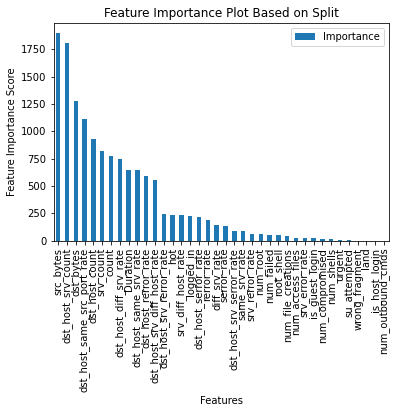

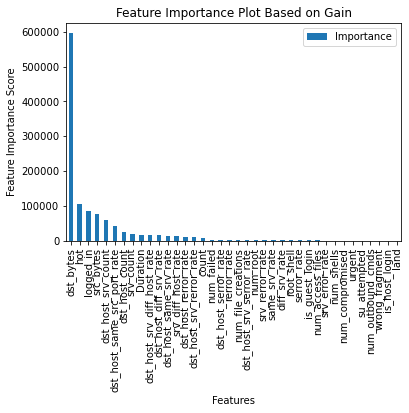

ROC CURVE


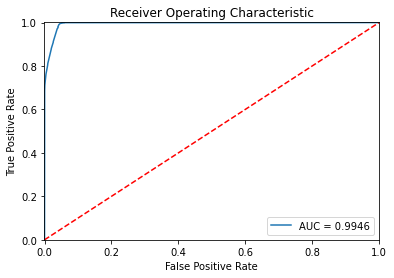

In [47]:
lgm=lightgbm_classifier(X_train, X_test, X_valid, y_train.values[:,0], y_test.values[:,0], y_valid.values[:,0],categorical_features=['wrong_fragment','is_host_login','is_guest_login'], class_weight=20)

In [102]:
class LGBMClassifier_GainFE(lgb.LGBMClassifier):
    @property
    def feature_importances_(self):
        if self._n_features is None:
            raise LGBMNotFittedError('No feature_importances found. Need to call fit beforehand.')
        return self.booster_.feature_importance(importance_type='gain')

In [103]:
clf2 = LGBMClassifier_GainFE(num_leaves= 15, max_depth=-1, 
                         random_state=314, 
                         silent=True, 
                         metric='None', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.1)

In [105]:
clf2.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier_GainFE(colsample_bytree=0.9, metric='None', n_estimators=1000,
                      n_jobs=4, num_leaves=15, random_state=314, subsample=0.9)

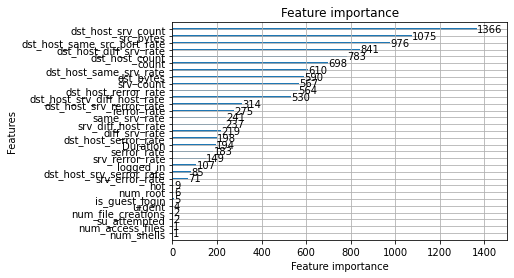

In [48]:
from lightgbm import plot_importance
plot_importance(lgm, importance_type='split')

In [51]:
lgm.booster_.feature_importance(importance_type = 'gain')

array([3.90054541e+02, 8.80575069e+04, 1.14325519e+05, 0.00000000e+00,
       0.00000000e+00, 5.25393974e-04, 7.82429062e-02, 0.00000000e+00,
       6.12673932e+04, 0.00000000e+00, 0.00000000e+00, 7.05105010e-02,
       5.79198937e+00, 8.89278017e-03, 1.07161002e-04, 8.91803029e-06,
       0.00000000e+00, 0.00000000e+00, 1.66371241e-01, 2.17877023e+03,
       1.65834631e+03, 2.63367189e+02, 1.38179920e+03, 2.06523890e+04,
       7.08741984e+03, 1.09304856e+04, 2.25130631e+03, 1.94579584e+03,
       2.79831328e+03, 5.85775506e+05, 3.06545442e+04, 7.52813725e+03,
       3.56715270e+04, 2.76064867e+05, 2.38836527e+04, 4.37254228e+02,
       9.38432260e+04, 1.03467943e+03])

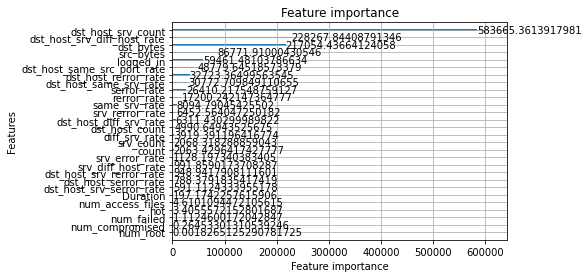

In [37]:
plot_importance(lgm, importance_type='gain')

## TabNet

In [ ]:
!pip install pytorch_tabnet

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier

classifier = TabNetClassifier()
classifier.fit(X_train=X_train, y_train=y_train)

#predictions = classifier.predict_proba(X_test)[:,1]